In [4]:
%load_ext autoreload
%autoreload 2

from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

import os
import sys
module_path = os.path.abspath(os.path.join('/workspaces/pose'))
if module_path not in sys.path:
    sys.path.insert(0, '/workspaces/pose')

from pose import abelian_utils, fourier_utils3, hex_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
mean = np.array([0, 0, 0])
# mean = np.array([0.338, 0.334, 0.123])
fourier_coef_shape = (4, 4, 4)
# cov = 0.06 * np.eye(3)
cov = 0.03 * np.eye(3)
generators = np.array([[1, 0.5, 0], [0, sqrt(3)/2, 0], [0, 0, 1]])
# generators = np.array([[1.5, 0.5, 0], [0, sqrt(3)/2, 0], [0, 0, 1.8]])
generators = generators / np.array(fourier_coef_shape)  # -> domain = np.array([1,sqrt(3)/2,1])
bf = abelian_utils.BumpFunction(mean, cov, generators, fourier_coef_shape)

In [47]:
baseline_bump = bf.get_values_primal_unshuffled().reshape(*fourier_coef_shape)

In [22]:
baseline_bump_reconstructed = abelian_utils.unshuffle(bf.func_reconstructed.domain, bf.values_reconstructed, fourier_coef_shape, 1).reshape(*fourier_coef_shape)

/workspaces/pose/pose/abelian_utils.py:269: ComplexWarning: Casting complex values to real discards the imaginary part
  self._values_reconstructed[idx] = value  # imaginary part is discarded -> no issue since the reconstruced function values are purely real


In [23]:
np.allclose(baseline_bump, baseline_bump_reconstructed, rtol=1e-15, atol=1e-15)

True

In [ ]:
zero_coefs = abelian_utils.get_0_coefs(fourier_coef_shape, cov, generators)

In [178]:
center = np.array([0.338, 0.334, 0.123])
rot_mat = fourier_utils3._rot_mat_complete(fourier_coef_shape, center)
coefs_cropped_flat = rot_mat.dot(zero_coefs)
coefs_cropped = abelian_utils.unflatten_coefs(coefs_cropped_flat, fourier_coef_shape)
coefs_cropped = coefs_cropped.reshape(fourier_coef_shape[0], fourier_coef_shape[1], fourier_coef_shape[2]//2+1)
coefs_appended = abelian_utils.append_conjugate_symmetry(coefs_cropped, fourier_coef_shape)
coefs = coefs_appended.reshape(fourier_coef_shape)

In [193]:
rot_mat[:8,:8]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.71593648,  0.69816542,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69816542,  0.71593648,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.0251301 ,
         0.99968419,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.99968419,
         0.0251301 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.75288828,  0.65814834],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.65814834, -0.75288828]])

In [179]:
baseline_coefs = bf.get_values_dual_unshuffled().reshape(*fourier_coef_shape)

In [180]:
np.allclose(baseline_coefs, coefs, rtol=1e-4, atol=1e-4)

False

In [190]:
np.fft.fftfreq(fourier_coef_shape[2], 0.25)

array([ 0.,  1., -2., -1.])

In [48]:
baseline_bump

array([[[1.22193616e+01, 4.31283417e+00, 3.78894342e-01, 4.31283417e+00],
        [4.31286531e+00, 1.52222952e+00, 1.33732049e-01, 1.52222952e+00],
        [3.78985329e-01, 1.33763197e-01, 1.17514648e-02, 1.33763197e-01],
        [4.31286531e+00, 1.52222952e+00, 1.33732049e-01, 1.52222952e+00]],

       [[4.31286531e+00, 1.52222952e+00, 1.33732049e-01, 1.52222952e+00],
        [5.53528606e-01, 1.95368397e-01, 1.71636510e-02, 1.95368397e-01],
        [5.53528606e-01, 1.95368397e-01, 1.71636510e-02, 1.95368397e-01],
        [4.31286531e+00, 1.52222952e+00, 1.33732049e-01, 1.52222952e+00]],

       [[3.78985329e-01, 1.33763197e-01, 1.17514648e-02, 1.33763197e-01],
        [5.53528606e-01, 1.95368397e-01, 1.71636510e-02, 1.95368397e-01],
        [3.78985329e-01, 1.33763197e-01, 1.17514648e-02, 1.33763197e-01],
        [5.53528606e-01, 1.95368397e-01, 1.71636510e-02, 1.95368397e-01]],

       [[4.31286531e+00, 1.52222952e+00, 1.33732049e-01, 1.52222952e+00],
        [4.31286531e+00, 1.52222

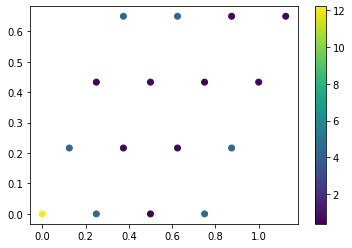

In [49]:
plt.scatter(XXX[:,:,0], YYY[:,:,0], c=baseline_bump[:,:,0])
plt.colorbar()

In [86]:
u_diff, v_diff, w_diff = hex_utils.get_3d_distances(*fourier_coef_shape)
pos = np.stack((u_diff[0], v_diff[0], w_diff[0]), axis=-1)
Z = multivariate_normal.pdf(x=pos, mean=np.zeros(3), cov=cov).reshape(fourier_coef_shape)
Z = abelian_utils.unwrap_single(Z, fourier_coef_shape, 1)
Z  # confirmed correct with MATLAB

array([[[1.22193559e+01, 4.31179625e+00, 1.89447105e-01, 4.31179625e+00],
        [4.31179625e+00, 1.52148665e+00, 6.68494577e-02, 1.52148665e+00],
        [1.89447105e-01, 6.68494577e-02, 2.93716019e-03, 6.68494577e-02],
        [4.31179625e+00, 1.52148665e+00, 6.68494577e-02, 1.52148665e+00]],

       [[4.31179625e+00, 1.52148665e+00, 6.68494577e-02, 1.52148665e+00],
        [5.36881031e-01, 1.89447105e-01, 8.32372490e-03, 1.89447105e-01],
        [5.36881031e-01, 1.89447105e-01, 8.32372490e-03, 1.89447105e-01],
        [4.31179625e+00, 1.52148665e+00, 6.68494577e-02, 1.52148665e+00]],

       [[1.89447105e-01, 6.68494577e-02, 2.93716019e-03, 6.68494577e-02],
        [5.36881031e-01, 1.89447105e-01, 8.32372490e-03, 1.89447105e-01],
        [1.89447105e-01, 6.68494577e-02, 2.93716019e-03, 6.68494577e-02],
        [5.36881031e-01, 1.89447105e-01, 8.32372490e-03, 1.89447105e-01]],

       [[4.31179625e+00, 1.52148665e+00, 6.68494577e-02, 1.52148665e+00],
        [4.31179625e+00, 1.52148

In [74]:
u_diff_unwrapped = abelian_utils.unwrap_multi(u_diff.reshape((*fourier_coef_shape, *fourier_coef_shape)), fourier_coef_shape, 1).reshape((np.prod(fourier_coef_shape), np.prod(fourier_coef_shape)))
v_diff_unwrapped = abelian_utils.unwrap_multi(v_diff.reshape((*fourier_coef_shape, *fourier_coef_shape)), fourier_coef_shape, 1).reshape((np.prod(fourier_coef_shape), np.prod(fourier_coef_shape)))
w_diff_unwrapped = abelian_utils.unwrap_multi(w_diff.reshape((*fourier_coef_shape, *fourier_coef_shape)), fourier_coef_shape, 1).reshape((np.prod(fourier_coef_shape), np.prod(fourier_coef_shape)))

In [81]:
pos_unwrapped = np.stack((u_diff_unwrapped[0], v_diff_unwrapped[0], w_diff_unwrapped[0]), axis=-1)
pos_unwrapped.shape

(64, 3)

In [95]:
abelian_utils.unwrap_multi(w_diff.reshape((*fourier_coef_shape, *fourier_coef_shape)), fourier_coef_shape, 1)[0,0,0]

array([[[ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25]],

       [[ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25]],

       [[ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25]],

       [[ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25],
        [ 0.  ,  0.25,  0.5 , -0.25]]])

In [83]:
np.allclose(abelian_utils.unwrap_single(pos.reshape((*fourier_coef_shape, 3)), fourier_coef_shape, 3).reshape((-1,3)), pos_unwrapped, rtol=1e-15, atol=1e-15)

True

In [85]:
from scipy.io import savemat
savemat("3d_distances.mat", {'pos': pos, 'pos_unwrapped': pos_unwrapped, 'Z': Z})

In [53]:
u_diff[0].reshape(fourier_coef_shape)

array([[[ 0.   ,  0.   ,  0.   ,  0.   ],
        [ 0.125,  0.125,  0.125,  0.125],
        [ 0.   ,  0.   ,  0.   ,  0.   ],
        [-0.375, -0.375, -0.375, -0.375]],

       [[ 0.25 ,  0.25 ,  0.25 ,  0.25 ],
        [ 0.375,  0.375,  0.375,  0.375],
        [-0.25 , -0.25 , -0.25 , -0.25 ],
        [-0.125, -0.125, -0.125, -0.125]],

       [[ 0.5  ,  0.5  ,  0.5  ,  0.5  ],
        [-0.375, -0.375, -0.375, -0.375],
        [ 0.   ,  0.   ,  0.   ,  0.   ],
        [ 0.125,  0.125,  0.125,  0.125]],

       [[-0.25 , -0.25 , -0.25 , -0.25 ],
        [-0.125, -0.125, -0.125, -0.125],
        [ 0.25 ,  0.25 ,  0.25 ,  0.25 ],
        [ 0.375,  0.375,  0.375,  0.375]]])

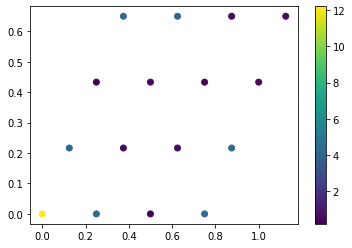

In [51]:
plt.scatter(XXX[:,:,0], YYY[:,:,0], c=Z[:,:,0])
plt.colorbar()

In [4]:
# fourier_coef_shape = (5, 4, 4)
abelian_utils.unflatten_coefs(zero_coefs, fourier_coef_shape).reshape((fourier_coef_shape[0], fourier_coef_shape[1], fourier_coef_shape[2]//2+1))

NameError: name 'zero_coefs' is not defined

In [201]:
# n = 5
abelian_utils.unflatten_coefs(zero_coefs, fourier_coef_shape).reshape((fourier_coef_shape[0], fourier_coef_shape[1], fourier_coef_shape[2]//2+1))

array([[[1.00000000e+00+0.00000000e+00j, 3.05944212e-01+1.86872126e-17j,
         8.78479206e-03+9.02192924e-18j],
        [2.06152992e-01-1.58435639e-14j, 6.30713147e-02-4.83616842e-15j,
         1.81101117e-03-1.33883378e-16j],
        [1.80684231e-03-1.18447310e-14j, 5.52792945e-04-3.62605370e-15j,
         1.58727340e-05-1.08537812e-16j],
        [1.80684231e-03+1.18447310e-14j, 5.52792945e-04+3.63958423e-15j,
         1.58727340e-05+1.21346638e-16j],
        [2.06152992e-01+1.58435639e-14j, 6.30713147e-02+4.84532062e-15j,
         1.81101117e-03+1.35091967e-16j]],

       [[2.06152992e-01-1.58350768e-14j, 6.30713147e-02-4.84487596e-15j,
         1.81101117e-03-1.33015863e-16j],
        [2.06152992e-01-7.41978476e-15j, 6.30713147e-02-2.26361976e-15j,
         1.81101117e-03-5.50818413e-17j],
        [8.76131006e-03-5.91704280e-15j, 2.68047210e-03-1.80554479e-15j,
         7.69662870e-05-4.51197461e-17j],
        [3.16547104e-05-8.13166221e-17j, 9.68457542e-06-1.32164887e-17j,
     

In [197]:
# n = 4
abelian_utils.unflatten_coefs(zero_coefs, fourier_coef_shape).reshape((fourier_coef_shape[0], fourier_coef_shape[1], fourier_coef_shape[2]//2+1))

array([[[1.00000001e+00+0.00000000e+00j, 3.05967690e-01+2.85439774e-17j,
         1.75226153e-02+0.00000000e+00j],
        [2.06153670e-01-4.99970298e-15j, 6.30763614e-02-1.53536552e-15j,
         3.61235140e-03-7.21111007e-17j],
        [3.61235140e-03+0.00000000e+00j, 1.10526280e-03+3.15486066e-17j,
         6.32978430e-05+0.00000000e+00j],
        [2.06153670e-01+4.99970298e-15j, 6.30763614e-02+1.57142107e-15j,
         3.61235140e-03+7.21111007e-17j]],

       [[2.06153670e-01-5.04777705e-15j, 6.30763614e-02-1.50832386e-15j,
         3.61235140e-03-8.11249883e-17j],
        [2.06153670e-01-2.76425886e-15j, 6.30763614e-02-8.47305434e-16j,
         3.61235140e-03-5.10786964e-17j],
        [8.79295655e-03-1.37011091e-15j, 2.69036057e-03-3.96611054e-16j,
         1.54075593e-04-2.10324044e-17j],
        [8.79295655e-03+0.00000000e+00j, 2.69036057e-03+4.80740672e-17j,
         1.54075593e-04+9.01388759e-18j]],

       [[3.61235140e-03+0.00000000e+00j, 1.10526280e-03+1.95300898e-17j,
   

In [195]:
baseline_coefs

array([[[ 9.99999988e-01+0.00000000e+00j,
          2.19020650e-01-2.13582444e-01j,
          4.40344994e-04+0.00000000e+00j,
          2.19020650e-01+2.13582444e-01j],
        [-1.55209798e-01-1.35678689e-01j,
         -6.29727375e-02+3.43365343e-03j,
         -6.83458582e-05-5.97454320e-05j,
         -5.01556491e-03-6.28665233e-02j],
        [ 4.82895991e-04+0.00000000e+00j,
          1.05764195e-04-1.03138107e-04j,
          2.12640835e-07+0.00000000e+00j,
          1.05764195e-04+1.03138107e-04j],
        [-1.55209798e-01+1.35678689e-01j,
         -5.01556491e-03+6.28665233e-02j,
         -6.83458582e-05+5.97454320e-05j,
         -6.29727375e-02-3.43365343e-03j]],

       [[ 1.26183051e-01-1.63023466e-01j,
         -7.18225649e-03-6.26559907e-02j,
          5.55640755e-05-7.17865678e-05j,
          6.24556449e-02-8.75502107e-03j],
        [-2.02296563e-01+3.96907159e-02j,
         -3.58298852e-02+5.19000815e-02j,
         -8.90802800e-05+1.74776082e-05j,
         -5.27843656e-02-3.

In [198]:
coefs

array([[[ 1.00000001e+00+0.00000000e+00j,
          2.19053432e-01-2.13616061e-01j,
          4.40344994e-04+1.75170814e-02j,
          2.19053432e-01+2.13616061e-01j],
        [-1.55210682e-01-1.35679696e-01j,
         -6.29827939e-02+3.43439125e-03j,
          2.30836601e-03-2.77858399e-03j,
         -5.01607026e-03-6.28765967e-02j],
        [ 4.82904624e-04-3.57992818e-03j,
         -6.58948231e-04-8.87351726e-04j,
         -6.24972480e-05+1.00354830e-05j,
         -6.58948231e-04+8.87351726e-04j],
        [-1.55210682e-01+1.35679696e-01j,
         -5.01607026e-03+6.28765967e-02j,
          2.30836601e-03+2.77858399e-03j,
         -6.29827939e-02-3.43439125e-03j]],

       [[-1.08266677e-01-1.75435635e-01j,
         -6.11920558e-02-1.53022768e-02j,
          3.02544559e-03-1.97376838e-03j,
          1.37596819e-02-6.15572784e-02j],
        [-3.39499603e-02+2.03338968e-01j,
          3.59996135e-02+5.17943549e-02j,
         -3.57685491e-03-5.05164917e-04j,
         -5.08733240e-02+3.

In [189]:
baseline_coefs / coefs

array([[[ 9.99999976e-01+0.00000000e+00j,
          9.99846588e-01+3.85648351e-06j,
          6.31521697e-04-2.51221591e-02j,
          9.99846588e-01-3.85648351e-06j],
        [ 9.99993556e-01-8.57390764e-07j,
          9.99840168e-01+2.99919950e-06j,
          6.31496103e-04-2.51219983e-02j,
          9.99840168e-01-4.71371800e-06j],
        [ 1.78704292e-02+1.32479272e-01j,
          1.78671772e-02+1.32459020e-01j,
         -3.31687986e-03-5.32607313e-04j,
          1.78671772e-02-1.32459020e-01j],
        [ 9.99993556e-01+8.57390764e-07j,
          9.99840168e-01+4.71371800e-06j,
          6.31496103e-04+2.51219983e-02j,
          9.99840168e-01-2.99919950e-06j]],

       [[ 3.51504451e-01+9.36179640e-01j,
          3.51446924e-01+9.36037396e-01j,
          2.37408371e-02-8.23933318e-03j,
          3.51454145e-01+9.36034685e-01j],
        [ 3.51502660e-01+9.36185839e-01j,
          3.51445133e-01+9.36043594e-01j,
          2.37409917e-02-8.23928426e-03j,
          3.51452354e-01+9.

In [182]:
np.abs(baseline_coefs / coefs)

array([[[0.99999998, 0.99984659, 0.0251301 , 0.99984659],
        [0.99999356, 0.99984017, 0.02512993, 0.99984017],
        [0.13367913, 0.13365862, 0.00335937, 0.13365862],
        [0.99999356, 0.99984017, 0.02512993, 0.99984017]],

       [[0.99999385, 0.99984046, 0.02512994, 0.99984046],
        [0.99999902, 0.99984563, 0.02513007, 0.99984563],
        [0.99595136, 0.99579859, 0.02502835, 0.99579859],
        [0.99309192, 0.99293959, 0.0249565 , 0.99293959]],

       [[0.25069533, 0.25065688, 0.0063    , 0.25065688],
        [0.99611302, 0.99596023, 0.02503242, 0.99596023],
        [0.92585644, 0.92571442, 0.02326686, 0.92571442],
        [0.99611302, 0.99596023, 0.02503242, 0.99596023]],

       [[0.99999385, 0.99984046, 0.02512994, 0.99984046],
        [0.99309192, 0.99293959, 0.0249565 , 0.99293959],
        [0.99595136, 0.99579859, 0.02502835, 0.99579859],
        [0.99999902, 0.99984563, 0.02513007, 0.99984563]]])

In [77]:
tmp1 = abelian_utils.crop_conjugate_symmetry(baseline_coefs, fourier_coef_shape)
tmp1

array([[[ 1.00000001e+00+0.00000000e+00j,
          3.05967690e-01+5.10786964e-17j,
          1.75226153e-02+0.00000000e+00j],
        [ 4.20648088e-17-2.06153665e-01j,
          3.60555504e-17-6.30763599e-02j,
          9.01388759e-18-3.61235131e-03j],
        [-3.61232783e-03+0.00000000e+00j,
         -1.10525559e-03+0.00000000e+00j,
         -6.32974300e-05+0.00000000e+00j],
        [ 4.20648088e-17+2.06153665e-01j,
          3.00462920e-18+6.30763599e-02j,
          9.01388759e-18+3.61235131e-03j]],

       [[ 1.45771705e-01-1.45771705e-01j,
          4.46014314e-02-4.46014314e-02j,
          2.55430147e-03-2.55430147e-03j],
        [-1.45771705e-01-1.45771705e-01j,
         -4.46014314e-02-4.46014314e-02j,
         -2.55430147e-03-2.55430147e-03j],
        [-6.19518011e-03+6.19518011e-03j,
         -1.89552493e-03+1.89552493e-03j,
         -1.08555756e-04+1.08555756e-04j],
        [ 6.19518011e-03+6.19518011e-03j,
          1.89552493e-03+1.89552493e-03j,
          1.08555756e-04+

In [78]:
tmp2 = abelian_utils.unflatten_coefs(zero_coefs, fourier_coef_shape).reshape(fourier_coef_shape[0], fourier_coef_shape[1], fourier_coef_shape[2]//2+1)
tmp2

array([[[1.00000001e+00+0.00000000e+00j, 3.05967690e-01+2.85439774e-17j,
         1.75226153e-02+0.00000000e+00j],
        [2.06153670e-01-4.99970298e-15j, 6.30763614e-02-1.53536552e-15j,
         3.61235140e-03-7.21111007e-17j],
        [3.61235140e-03+0.00000000e+00j, 1.10526280e-03+3.15486066e-17j,
         6.32978430e-05+0.00000000e+00j],
        [2.06153670e-01+4.99970298e-15j, 6.30763614e-02+1.57142107e-15j,
         3.61235140e-03+7.21111007e-17j]],

       [[2.06153670e-01-5.04777705e-15j, 6.30763614e-02-1.50832386e-15j,
         3.61235140e-03-8.11249883e-17j],
        [2.06153670e-01-2.76425886e-15j, 6.30763614e-02-8.47305434e-16j,
         3.61235140e-03-5.10786964e-17j],
        [8.79295655e-03-1.37011091e-15j, 2.69036057e-03-3.96611054e-16j,
         1.54075593e-04-2.10324044e-17j],
        [8.79295655e-03+0.00000000e+00j, 2.69036057e-03+4.80740672e-17j,
         1.54075593e-04+9.01388759e-18j]],

       [[3.61235140e-03+0.00000000e+00j, 1.10526280e-03+1.95300898e-17j,
   

In [64]:
np.allclose(baseline_coefs, coefs, rtol=1e-15, atol=1e-15)

False

In [173]:
baseline_coefs_alt = np.fft.fftn(baseline_bump, s=fourier_coef_shape, norm='forward') * (1.0 * sqrt(3)/2 * 1.0)
baseline_bump_alt_reconstructed = np.fft.ifftn(baseline_coefs_alt, s=fourier_coef_shape, norm='forward') / (1.0 * sqrt(3)/2 * 1.0)
# baseline_coefs_alt = np.fft.fftn(baseline_bump, s=fourier_coef_shape, norm='forward') * (1.5 * sqrt(3)/2 * 1.8)
# baseline_bump_alt_reconstructed = np.fft.ifftn(baseline_coefs_alt, s=fourier_coef_shape, norm='forward') / (1.5 * sqrt(3)/2 * 1.8)

In [174]:
baseline_coefs_alt

array([[[ 9.99999988e-01+0.00000000e+00j,
          2.19020650e-01-2.13582444e-01j,
          4.40344994e-04+0.00000000e+00j,
          2.19020650e-01+2.13582444e-01j],
        [-2.60944719e-02-2.04495420e-01j,
         -4.93918604e-02-3.92153992e-02j,
         -1.14905702e-05-9.00485354e-05j,
          3.79614039e-02-5.03620415e-02j],
        [-3.49659028e-03+0.00000000e+00j,
         -7.65825485e-04+7.46810307e-04j,
         -1.53970604e-06+0.00000000e+00j,
         -7.65825485e-04-7.46810307e-04j],
        [-2.60944719e-02+2.04495420e-01j,
          3.79614039e-02+5.03620415e-02j,
         -1.14905702e-05+9.00485354e-05j,
         -4.93918604e-02+3.92153992e-02j]],

       [[ 6.01213186e-02-1.97191754e-01j,
         -2.89488869e-02-5.60299250e-02j,
          2.64741220e-05-8.68324027e-05j,
          5.52845078e-02-3.03482084e-02j],
        [-2.03215991e-01-3.46775627e-02j,
         -5.19150176e-02+3.58082661e-02j,
         -8.94851452e-05-1.52700913e-05j,
         -3.71019802e-02-5.

In [123]:
np.allclose(baseline_bump, baseline_bump_alt_reconstructed)

True

In [124]:
np.allclose(baseline_coefs, baseline_coefs_alt, rtol=1e-15, atol=1e-15)

True

In [127]:
tmp3 = abelian_utils.crop_conjugate_symmetry(baseline_coefs_alt, fourier_coef_shape)
np.allclose(baseline_coefs_alt, abelian_utils.append_conjugate_symmetry(tmp3, fourier_coef_shape), rtol=1e-15, atol=1e-15)

True

In [130]:
tmp4 = np.fft.rfftn(baseline_bump, s=fourier_coef_shape, norm='forward')  # * (1.0 * sqrt(3)/2 * 1.0)
np.allclose(baseline_coefs_alt, abelian_utils.append_conjugate_symmetry(tmp4, fourier_coef_shape), rtol=1e-15, atol=1e-15)

True

In [143]:
tmp5 = rot_mat.dot(zero_coefs)
tmp6 = abelian_utils.unflatten_coefs(tmp5, fourier_coef_shape).reshape((fourier_coef_shape[0], fourier_coef_shape[1], fourier_coef_shape[2]//2+1))
np.allclose(baseline_coefs_alt, abelian_utils.append_conjugate_symmetry(tmp6, fourier_coef_shape), rtol=1e-15, atol=1e-15)

False

In [137]:
np.abs(baseline_coefs_alt) / np.abs(abelian_utils.append_conjugate_symmetry(tmp6, fourier_coef_shape))

array([[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [9.99999976e-01, 9.99999976e-01, 9.99999976e-01, 9.99999976e-01],
        [9.99993476e-01, 9.99993476e-01, 9.99993476e-01, 9.99993476e-01],
        [9.99999976e-01, 9.99999976e-01, 9.99999976e-01, 9.99999976e-01]],

       [[9.99993464e-01, 9.99993464e-01, 9.99993464e-01, 9.99993464e-01],
        [9.99993464e-01, 9.99993464e-01, 9.99993464e-01, 9.99993464e-01],
        [9.96400662e-01, 9.96400662e-01, 9.96400662e-01, 9.96400662e-01],
        [9.96400662e-01, 9.96400662e-01, 9.96400662e-01, 9.96400662e-01]],

       [[5.32329908e-14, 6.52575552e-14, 1.89872454e-13, 6.52575552e-14],
        [9.92801325e-01, 9.92801325e-01, 9.92801325e-01, 9.92801325e-01],
        [2.32894335e-14, 1.76700870e-14, 3.79744908e-13, 1.76700870e-14],
        [9.92801325e-01, 9.92801325e-01, 9.92801325e-01, 9.92801325e-01]],

       [[9.99993464e-01, 9.99993464e-01, 9.99993464e-01, 9.99993464e-01],
        [9.96400662e-01, 9.96400

In [135]:
baseline_coefs_alt

array([[[ 1.00000001e+00+0.00000000e+00j,
          3.05967690e-01+3.45532358e-17j,
          1.75226153e-02+0.00000000e+00j,
          3.05967690e-01-3.45532358e-17j],
        [ 2.06153665e-01-6.36981390e-15j,
          6.30763599e-02-1.91695343e-15j,
          3.61235131e-03-5.40833256e-17j,
          6.30763599e-02-1.95300898e-15j],
        [ 3.61232783e-03+0.00000000e+00j,
          1.10525559e-03+1.35208314e-17j,
          6.32974300e-05+0.00000000e+00j,
          1.10525559e-03-1.35208314e-17j],
        [ 2.06153665e-01+6.36981390e-15j,
          6.30763599e-02+1.95300898e-15j,
          3.61235131e-03+5.40833256e-17j,
          6.30763599e-02+1.91695343e-15j]],

       [[ 1.45771705e-01-1.45771705e-01j,
          4.46014314e-02-4.46014314e-02j,
          2.55430147e-03-2.55430147e-03j,
          4.46014314e-02-4.46014314e-02j],
        [ 1.45771705e-01-1.45771705e-01j,
          4.46014314e-02-4.46014314e-02j,
          2.55430147e-03-2.55430147e-03j,
          4.46014314e-02-4.

In [136]:
abelian_utils.append_conjugate_symmetry(tmp6, fourier_coef_shape)

array([[[ 1.00000001e+00+0.00000000e+00j,
          3.05967690e-01+2.85439774e-17j,
          1.75226153e-02-0.00000000e+00j,
          3.05967690e-01-2.85439774e-17j],
        [ 2.06153670e-01-4.99970298e-15j,
          6.30763614e-02-1.53536552e-15j,
          3.61235140e-03-7.21111007e-17j,
          6.30763614e-02-1.57142107e-15j],
        [ 3.61235140e-03+0.00000000e+00j,
          1.10526280e-03+3.15486066e-17j,
          6.32978430e-05-0.00000000e+00j,
          1.10526280e-03-3.15486066e-17j],
        [ 2.06153670e-01+4.99970298e-15j,
          6.30763614e-02+1.57142107e-15j,
          3.61235140e-03+7.21111007e-17j,
          6.30763614e-02+1.53536552e-15j]],

       [[ 1.45772658e-01-1.45772658e-01j,
          4.46017229e-02-4.46017229e-02j,
          2.55431817e-03-2.55431817e-03j,
          4.46017229e-02-4.46017229e-02j],
        [ 1.45772658e-01-1.45772658e-01j,
          4.46017229e-02-4.46017229e-02j,
          2.55431817e-03-2.55431817e-03j,
          4.46017229e-02-4.

In [142]:
tmp7 = abelian_utils.append_conjugate_symmetry(abelian_utils.unflatten_coefs(zero_coefs, fourier_coef_shape).reshape((fourier_coef_shape[0], fourier_coef_shape[1], fourier_coef_shape[2]//2+1)), fourier_coef_shape)
tmp7

array([[[1.00000001e+00+0.00000000e+00j, 3.05967690e-01+2.85439774e-17j,
         1.75226153e-02-0.00000000e+00j, 3.05967690e-01-2.85439774e-17j],
        [2.06153670e-01-4.99970298e-15j, 6.30763614e-02-1.53536552e-15j,
         3.61235140e-03-7.21111007e-17j, 6.30763614e-02-1.57142107e-15j],
        [3.61235140e-03+0.00000000e+00j, 1.10526280e-03+3.15486066e-17j,
         6.32978430e-05-0.00000000e+00j, 1.10526280e-03-3.15486066e-17j],
        [2.06153670e-01+4.99970298e-15j, 6.30763614e-02+1.57142107e-15j,
         3.61235140e-03+7.21111007e-17j, 6.30763614e-02+1.53536552e-15j]],

       [[2.06153670e-01-5.04777705e-15j, 6.30763614e-02-1.50832386e-15j,
         3.61235140e-03-8.11249883e-17j, 6.30763614e-02-1.56841644e-15j],
        [2.06153670e-01-2.76425886e-15j, 6.30763614e-02-8.47305434e-16j,
         3.61235140e-03-5.10786964e-17j, 6.30763614e-02-8.95379501e-16j],
        [8.79295655e-03-1.37011091e-15j, 2.69036057e-03-3.96611054e-16j,
         1.54075593e-04-2.10324044e-17j, 2.

In [160]:
tmp8 = fourier_utils3._normal_toroidal(XXX, YYY, ZZZ, center=np.array([0.1, 0.2, 0.3]), cov=cov)
tmp8

array([[[4.79930282e-02, 2.78932736e+00, 2.04071549e+00, 5.26835886e-01],
        [7.22580393e-02, 4.19959592e+00, 3.07249001e+00, 7.93201212e-01],
        [3.83887620e-02, 2.23113290e+00, 1.63233170e+00, 4.21406571e-01],
        [7.19667608e-03, 4.18266699e-01, 3.06010454e-01, 7.90003748e-02]],

       [[4.32453230e-02, 2.51339344e+00, 1.83883792e+00, 4.74718701e-01],
        [3.86769413e-02, 2.24788171e+00, 1.64458539e+00, 4.24570014e-01],
        [1.22060463e-02, 7.09408431e-01, 5.19014296e-01, 1.33989945e-01],
        [1.35927653e-03, 7.90003748e-02, 5.77979089e-02, 1.49212434e-02]],

       [[1.37502328e-02, 7.99155667e-01, 5.84674776e-01, 1.50941008e-01],
        [7.30513061e-03, 4.24570014e-01, 3.10622058e-01, 8.01909173e-02],
        [1.36948044e-03, 7.95934201e-02, 5.82317901e-02, 1.50332552e-02],
        [9.05927822e-05, 5.26520070e-03, 3.85210312e-03, 9.94467956e-04]],

       [[1.54273336e-03, 8.96627809e-02, 6.55986919e-02, 1.69351118e-02],
        [4.86870839e-04, 2.82966

In [158]:
baseline_bump

array([[[4.32850526, 2.6098608 , 1.0774052 , 2.6098608 ],
        [2.61742185, 1.57816758, 0.65150063, 1.57816758],
        [1.09306671, 0.65906168, 0.27207447, 0.65906168],
        [2.61742185, 1.57816758, 0.65150063, 1.57816758]],

       [[2.61742185, 1.57816758, 0.65150063, 1.57816758],
        [1.13205669, 0.68257059, 0.28177943, 0.68257059],
        [1.13205669, 0.68257059, 0.28177943, 0.68257059],
        [2.61742185, 1.57816758, 0.65150063, 1.57816758]],

       [[1.09306671, 0.65906168, 0.27207447, 0.65906168],
        [1.13205669, 0.68257059, 0.28177943, 0.68257059],
        [1.09306671, 0.65906168, 0.27207447, 0.65906168],
        [1.13205669, 0.68257059, 0.28177943, 0.68257059]],

       [[2.61742185, 1.57816758, 0.65150063, 1.57816758],
        [2.61742185, 1.57816758, 0.65150063, 1.57816758],
        [1.13205669, 0.68257059, 0.28177943, 0.68257059],
        [1.13205669, 0.68257059, 0.28177943, 0.68257059]]])

In [161]:
tmp9 = np.fft.fftn(tmp8, s=fourier_coef_shape, norm='forward')  # * (1.0 * sqrt(3)/2 * 1.0)
tmp9

array([[[ 5.03129902e-01+0.j        , -1.85498991e-01-0.21061131j,
         -1.14261578e-01+0.j        , -1.85498991e-01+0.21061131j],
        [ 9.59236813e-02-0.19369973j, -1.16449248e-01+0.03126129j,
         -2.17844162e-02+0.04398951j,  4.57170332e-02+0.11156903j],
        [ 5.48557449e-02+0.j        , -2.02247675e-02-0.02296274j,
         -1.24578244e-02+0.j        , -2.02247675e-02+0.02296274j],
        [ 9.59236813e-02+0.19369973j,  4.57170332e-02-0.11156903j,
         -2.17844162e-02-0.04398951j, -1.16449248e-01-0.03126129j]],

       [[ 2.52195484e-01-0.16435455j, -1.61781152e-01-0.04497371j,
         -5.72739840e-02+0.03732517j, -2.41827809e-02+0.16616549j],
        [-6.96988556e-02-0.15378951j, -3.86793592e-02+0.08587676j,
          1.58287178e-02+0.03492583j,  9.00739088e-02+0.02752456j],
        [-1.40229460e-03-0.02517572j, -1.00216020e-02+0.00986904j,
          3.18463269e-04+0.00571745j,  1.10556262e-02+0.00869503j],
        [ 5.99275459e-02+0.04979128j, -1.25194838e-03

In [152]:
np.allclose(tmp9, abelian_utils.unflatten_coefs(zero_coefs, fourier_coef_shape).reshape(fourier_coef_shape[0], fourier_coef_shape[1], fourier_coef_shape[2]//2+1), rtol=1e-5, atol=1e-5)

False

In [153]:
tmp9 / abelian_utils.unflatten_coefs(zero_coefs, fourier_coef_shape).reshape(fourier_coef_shape[0], fourier_coef_shape[1], fourier_coef_shape[2]//2+1)

array([[[ 2.74893609e-01+0.00000000e+00j,
          4.55257683e-01-3.04107611e-01j,
          4.73320784e+00+0.00000000e+00j],
        [ 7.71732590e-01-4.01984495e-01j,
          8.33379308e-01-1.51948343e+00j,
          1.32879435e+01-6.92150016e+00j],
        [ 2.90524507e+01+0.00000000e+00j,
          4.81144375e+01-3.21399665e+01j,
          5.00234573e+02+0.00000000e+00j],
        [ 7.71732590e-01+4.01984495e-01j,
          1.72278918e+00-1.88011735e-01j,
          1.32879435e+01+6.92150016e+00j]],

       [[ 7.71732590e-01-4.01984495e-01j,
          8.33379308e-01-1.51948343e+00j,
          1.32879435e+01-6.92150016e+00j],
        [ 2.67303328e-01-5.47524977e-01j,
         -1.63025322e-01-1.20247950e+00j,
          4.60251589e+00-9.42746365e+00j],
        [ 4.83577415e+00-4.60913598e+00j,
          2.90967114e+00-1.29829875e+01j,
          8.32639367e+01-7.93616068e+01j],
        [ 1.10298768e+01+0.00000000e+00j,
          1.82668348e+01-1.22020642e+01j,
          1.89916016e+02-

In [16]:
zero_bump_reconstructed = abelian_utils.reconstruct_primal(zero_coefs, fourier_coef_shape)

In [17]:
zero_bump_reconstructed_alt = abelian_utils.reconstruct_primal_alt(zero_coefs, fourier_coef_shape)

In [19]:
baseline_bump / zero_bump_reconstructed

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [18]:
zero_bump_reconstructed / zero_bump_reconstructed_alt

array([[[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]],

       [[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]],

       [[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]],

       [[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]]])

In [187]:
zero_bump_reconstructed2 = abelian_utils.reconstruct_primal(zero_coefs, fourier_coef_shape)

In [188]:
zero_bump_reconstructed/zero_bump_reconstructed2

/tmp/ipykernel_339832/2927257151.py:1: RuntimeWarning: divide by zero encountered in true_divide
  zero_bump_reconstructed/zero_bump_reconstructed2
/tmp/ipykernel_339832/2927257151.py:1: RuntimeWarning: invalid value encountered in true_divide
  zero_bump_reconstructed/zero_bump_reconstructed2


array([[[ 1.15470054,  1.15470054,         nan,  1.15470054],
        [ 1.15470054,  1.15470054, -0.        ,  1.15470054],
        [ 1.15470054,  1.15470054,  0.5       ,  1.15470054],
        [ 1.15470054,  1.15470054, -0.        ,  1.15470054]],

       [[ 1.15470054,  1.15470054,  0.        ,  1.15470054],
        [ 1.15470054,  1.15470054,  1.        ,  1.15470054],
        [ 1.15470054,  1.15470054,         nan,  1.15470054],
        [ 1.15470054,  1.15470054,         nan,  1.15470054]],

       [[ 1.15470054,  1.15470054,  0.5       ,  1.15470054],
        [ 1.15470054,  1.15470054,  1.        ,  1.15470054],
        [ 1.15470054,  1.15470054,  0.66666667,  1.15470054],
        [ 1.15470054,  1.15470054,  1.        ,  1.15470054]],

       [[ 1.15470054,  1.15470054,         inf,  1.15470054],
        [ 1.15470054,  1.15470054,         nan,  1.15470054],
        [ 1.15470054,  1.15470054,         inf,  1.15470054],
        [ 1.15470054,  1.15470054,  3.        ,  1.15470054]]])

In [138]:
zero_bump_reconstructed_alt/baseline_bump

array([[[ 4.33012702e+00+0.j,  4.33012702e+00+0.j, -3.13879645e+06+0.j,
          4.33012702e+00+0.j],
        [ 4.33012702e+00+0.j,  4.33012702e+00+0.j, -5.30115813e+06+0.j,
          4.33012702e+00+0.j],
        [ 4.33012702e+00+0.j,  4.33012702e+00+0.j, -1.29584381e+07+0.j,
          4.33012702e+00+0.j],
        [ 4.33012702e+00+0.j,  4.33012702e+00+0.j, -5.30115813e+06+0.j,
          4.33012702e+00+0.j]],

       [[ 4.33012702e+00+0.j,  4.33012702e+00+0.j, -2.74225895e+06+0.j,
          4.33012702e+00+0.j],
        [ 4.33012702e+00+0.j,  4.33012702e+00+0.j,  2.17292723e+06+0.j,
          4.33012702e+00+0.j],
        [ 4.33012702e+00+0.j,  4.33012702e+00+0.j,  1.83082373e+06+0.j,
          4.33012702e+00+0.j],
        [ 4.33012702e+00+0.j,  4.33012702e+00+0.j, -2.81517793e+06+0.j,
          4.33012702e+00+0.j]],

       [[ 4.33012702e+00+0.j,  4.33012702e+00+0.j,  3.96686880e+06+0.j,
          4.33012702e+00+0.j],
        [ 4.33012702e+00+0.j,  4.33012702e+00+0.j,  1.22567776e+07+0.

In [73]:
np.allclose(baseline_bump, zero_bump_reconstructed_alt/55.42562584)

False

In [14]:
XXX, YYY, ZZZ = abelian_utils.get_3d_coordinates_unwrapped_vectorized(fourier_coef_shape, generators)
XXX[:,:,0].shape

(4, 4)

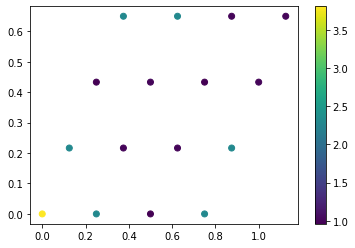

In [109]:
plt.scatter(XXX[:,:,0], YYY[:,:,0], c=baseline_bump[:,:,0])
plt.colorbar()

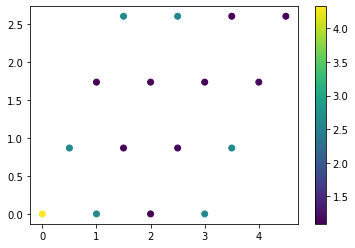

In [129]:
plt.scatter(XXX[:,:,0], YYY[:,:,0], c=baseline_bump_reconstructed[:,:,0])
plt.colorbar()

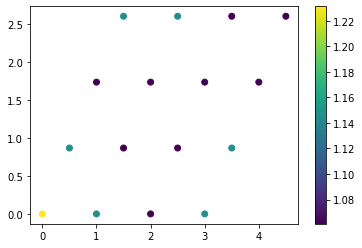

In [41]:
plt.scatter(XXX[:,:,0], YYY[:,:,0], c=zero_bump_reconstructed[:,:,0])
plt.colorbar()

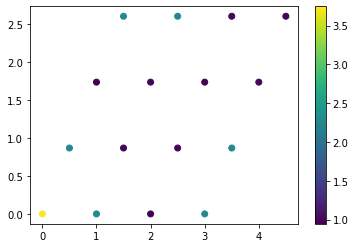

In [68]:
plt.scatter(XXX[:,:,0], YYY[:,:,0], c=zero_bump_reconstructed[:,:,0])
plt.colorbar()